# Credit Card Eligibility 
### Exploratory Data Analysis (EDA) on Risk Profiles:
1. What is the distribution of risk profiles among the users in the dataset?
2. Are there any correlations between user profile features (e.g., age, income, employment status) and their risk profiles?
3. How does the loan approval status vary across different risk profiles?
4. Are there any notable patterns or trends in the data that could provide insights into risk assessment?
### Model Building:
1. What type(s) of predictive model(s) do you plan to build for identifying risk profiles of future users? (e.g., logistic regression, decision trees, random forest)
2. How will you split the dataset into training and testing sets? What ratio will you use?
3. What evaluation metrics will you use to assess the performance of the predictive model(s)?

# Variable	Description
- ID :	An identifier for each individual (customer).
- Gender :	The gender of the individual, 0 for male, 1 for female.
- Own_car :	A binary feature indicating whether the individual owns a car.
- Own_property :	A binary feature indicating whether the individual owns a property.
- Work_phone :	A binary feature indicating whether the individual has a work phone.
- Phone :	A binary feature indicating whether the individual has a phone.
- Email :	A binary feature indicating whether the individual has provided an email address.
- Unemployed :	A binary feature indicating whether the individual is unemployed.
- Num_children :	The number of children the individual has.
- Num_family :	The total number of family members.
- Account_length :	The length of the individual's account with a bank or financial institution.
- Total_income :	The total income of the individual.
- Age :	The age of the individual.
- Years_employed :	The number of years the individual has been employed.
- Income_type :	The type of income (e.g., employed, self-employed, etc.).
- Education_type :	The education level of the individual.
- Family_status :	The family status of the individual.
- Housing_type :	The type of housing the individual lives in.
- Occupation_type :	The type of occupation the individual is engaged in.
- Target :	The target variable for the classification task, indicating whether the individual is eligible for a credit card or not (e.g., Yes/No, 1/0).

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import preprocessing 
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, precision_score,roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

# Preprocessing

In [2]:
df = pd.read_csv("Credit Card Eligibility 1.csv")
data = df.copy()
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

### Checking null values

In [4]:
df.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

### Checking duplicates

In [5]:
df.duplicated(subset='ID').sum()

0

# Encoding Features

## Reference for Encoding technique
https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

### The advantages of WOE transformation are

1. Handles outliers
2. No need for dummy variables
3. It can establish relationship between the independent and dependent variable

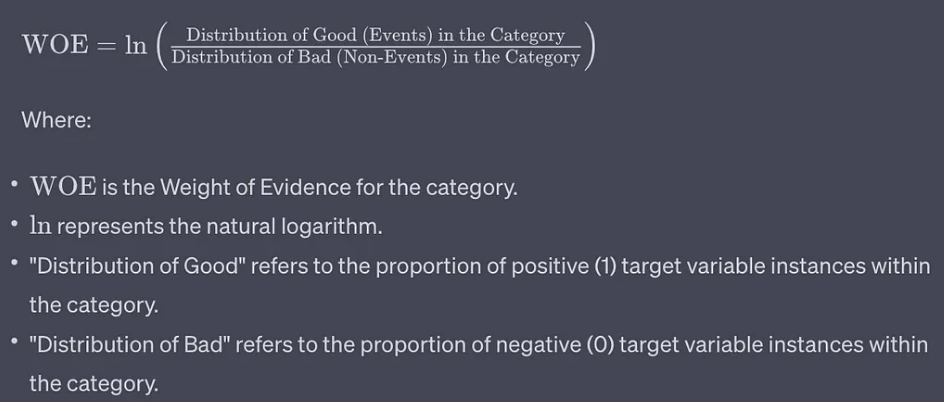

In [6]:
pd.set_option('future.no_silent_downcasting', True)

In [7]:
 # Perform Weight of Evidence Encoding on all columns except the target column 'default'
y = df['Target']
encoder = ce.WOEEncoder(cols=df.drop(columns=['ID','Target']).columns,drop_invariant=True)
df = encoder.fit_transform(df.drop(columns=['ID','Target']), df['Target'])
df = pd.concat([df,y],axis=1)
df.head()

,Gender,Own_car,Own_property,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,0.059812,-0.026012,-0.059863,0.017230,-0.007179,0.032902,-0.030215,-0.025369,0.077991,0.494506,1.880801,0.000000,0.023570,0.030415,0.101515,0.397514,-0.075833,1
1,0.059812,-0.026012,-0.059863,0.017230,-0.007179,0.032902,-0.030215,-0.025369,-0.437052,0.012408,0.000000,0.782188,0.023570,-0.029591,-0.036719,-0.016275,0.284350,0
2,-0.033151,0.014904,-0.059863,-0.043612,0.072512,0.032902,-0.030215,0.000685,-0.409950,0.086313,0.000000,0.000000,0.032971,-0.029591,0.173880,-0.016275,-0.154905,0
3,-0.033151,0.014904,-0.059863,0.017230,-0.007179,-0.167225,-0.030215,0.000685,-0.128023,0.376723,0.000000,-0.167225,-0.087975,0.030415,-0.065109,-0.016275,-0.075833,0
4,0.059812,-0.026012,-0.059863,-0.043612,0.072512,0.032902,-0.030215,-0.025369,-0.564101,0.086313,0.782188,0.000000,0.023570,0.030415,-0.036719,-0.016275,0.001336,0


# EDA

### 1. What is the distribution of eligibility profiles among the users in the dataset?

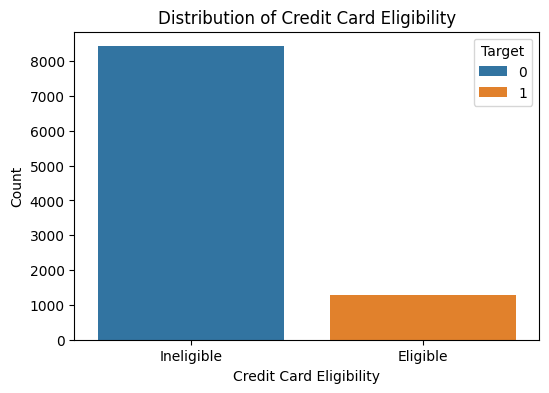

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=data, hue='Target')
plt.title('Distribution of Credit Card Eligibility')
plt.xlabel('Credit Card Eligibility')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ineligible', 'Eligible'])
plt.show()

In [9]:
data['Target'].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

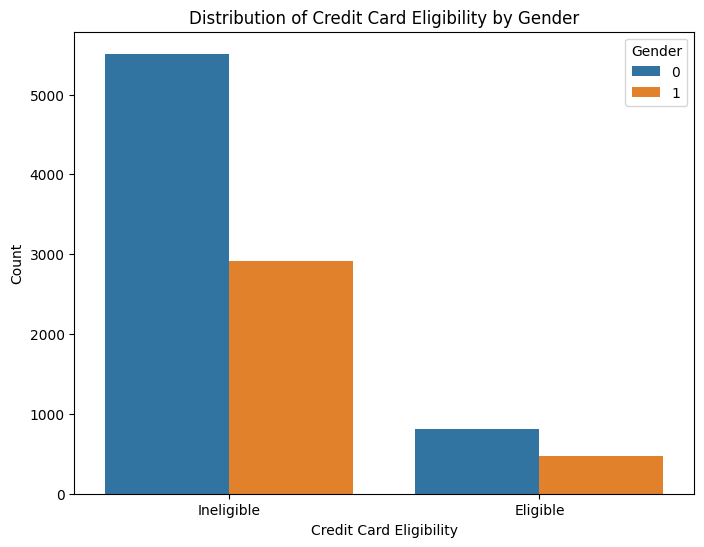

In [10]:
plt.figure(figsize=(8, 6))  # Adjusting the figure size for better clarity
sns.countplot(x='Target', data=data, hue='Gender')  # 'Gender' should be a column in your data
plt.title('Distribution of Credit Card Eligibility by Gender')
plt.xlabel('Credit Card Eligibility')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ineligible', 'Eligible'])
plt.legend(title='Gender')  # Adding a legend title for better clarity
plt.show()

In [11]:
male_counts = data[data['Gender'] == 0]['Target'].value_counts(normalize=True) * 100
female_counts = data[data['Gender'] == 1]['Target'].value_counts(normalize=True) * 100
print("Percentage distribution of Credit Card Eligibility for Males:")
print(male_counts)
print("\nPercentage distribution of Credit Card Eligibility for Females:")
print(female_counts)

Percentage distribution of Credit Card Eligibility for Males:
Target
0    87.157995
1    12.842005
Name: proportion, dtype: float64

Percentage distribution of Credit Card Eligibility for Females:
Target
0    86.089781
1    13.910219
Name: proportion, dtype: float64


### 2. Are there any correlations between user profile features (e.g., age, income, employment status) and their eligibility profiles?

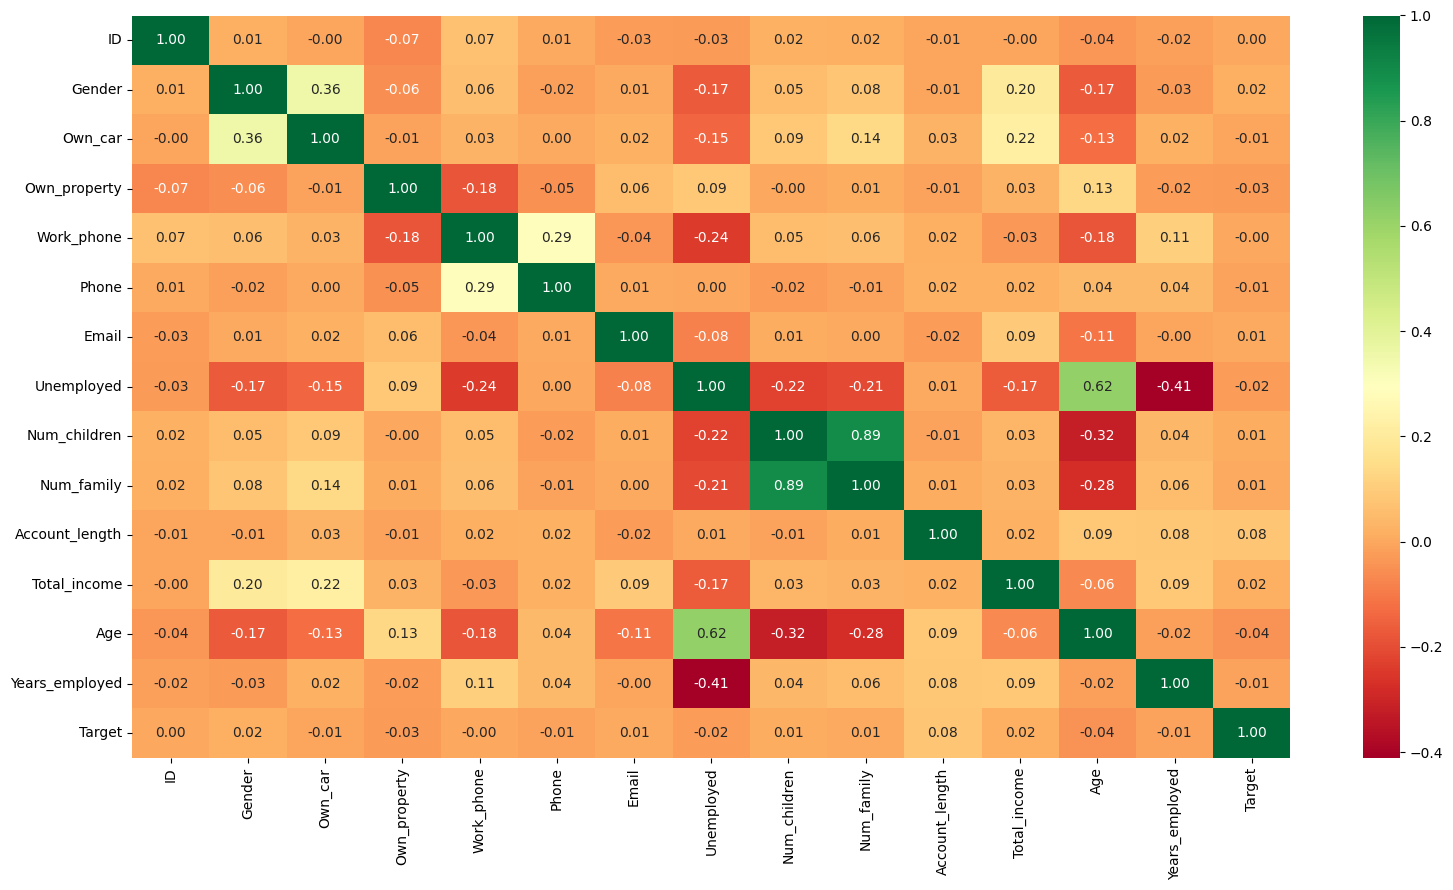

In [75]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(numeric_only=True),annot=True,fmt='.2f',cmap='RdYlGn')
plt.tight_layout();

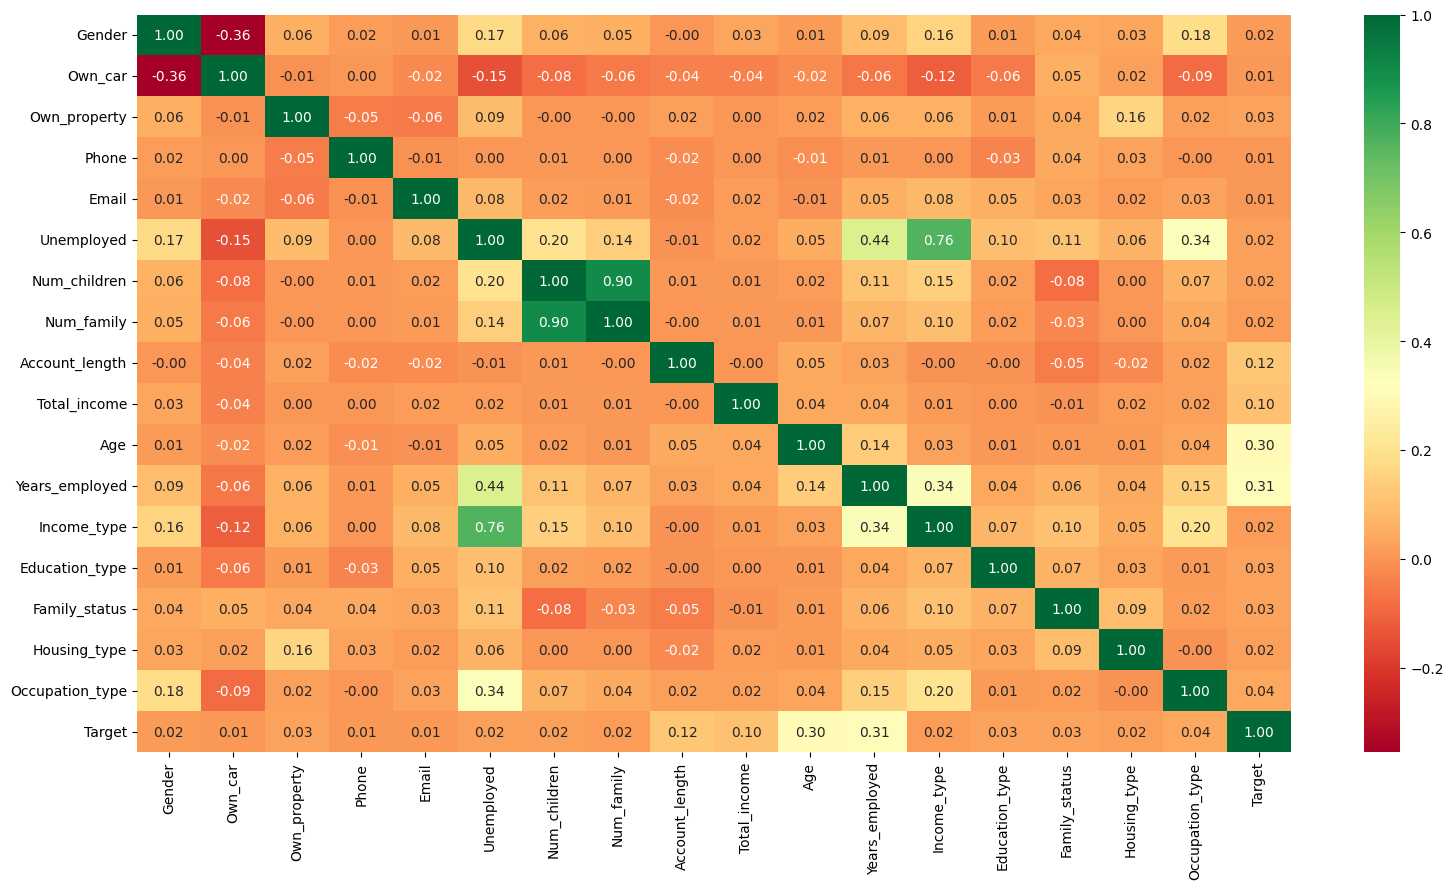

In [76]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='RdYlGn')
plt.tight_layout();

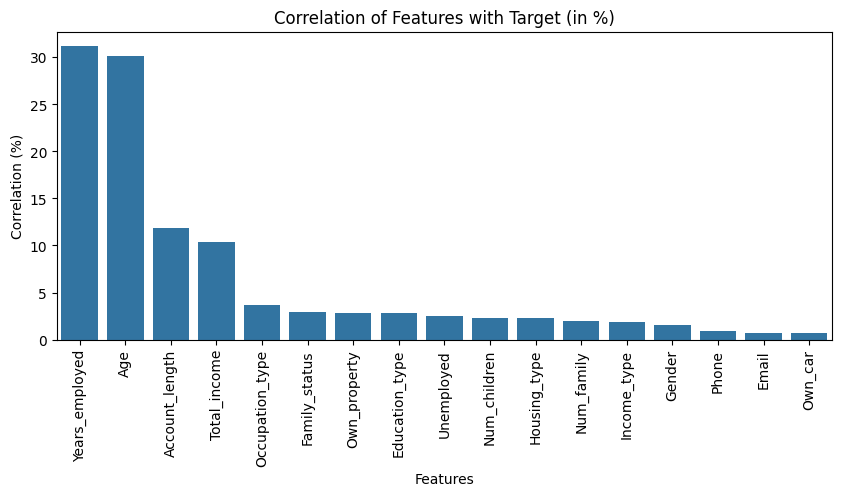

In [57]:
target_corr = df.corrwith(df['Target']) * 100
target_corr = target_corr.drop(labels='Target')
target_corr_sorted = target_corr.sort_values(ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(x=target_corr_sorted.index, y=target_corr_sorted.values)
plt.title('Correlation of Features with Target (in %)')
plt.xlabel('Features')
plt.ylabel('Correlation (%)')
plt.xticks(rotation=90)
plt.show()

### 3. How does the Credit Card Eligibility status vary across different profiles?

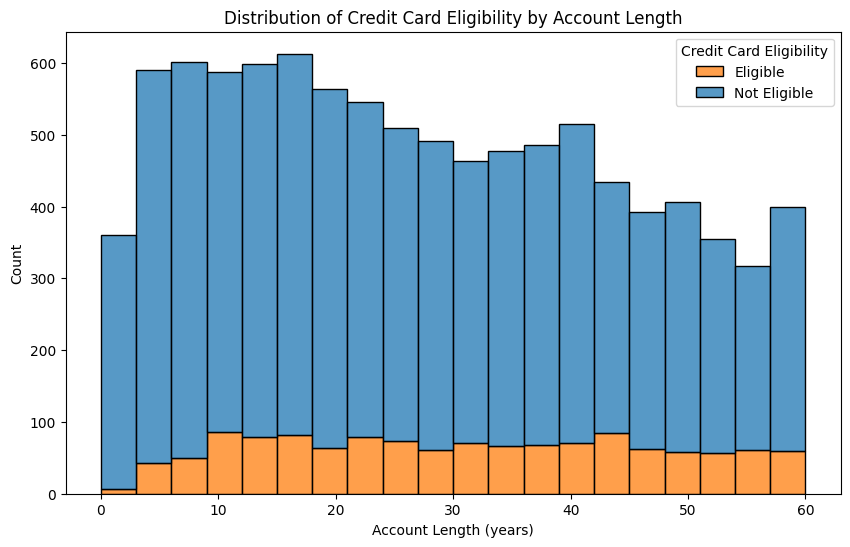

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Account_length', hue='Target', multiple='stack', bins=20)
plt.title('Distribution of Credit Card Eligibility by Account Length')
plt.xlabel('Account Length (years)')
plt.ylabel('Count')
plt.legend(title='Credit Card Eligibility', labels=['Eligible', 'Not Eligible'])
plt.show()

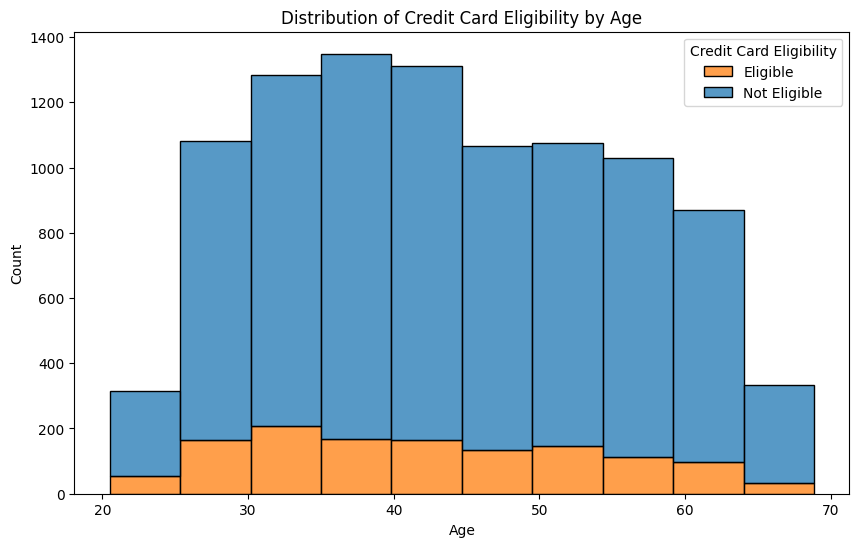

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Target', multiple='stack', bins=10)
plt.title('Distribution of Credit Card Eligibility by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Credit Card Eligibility', labels=['Eligible', 'Not Eligible'])
plt.show()

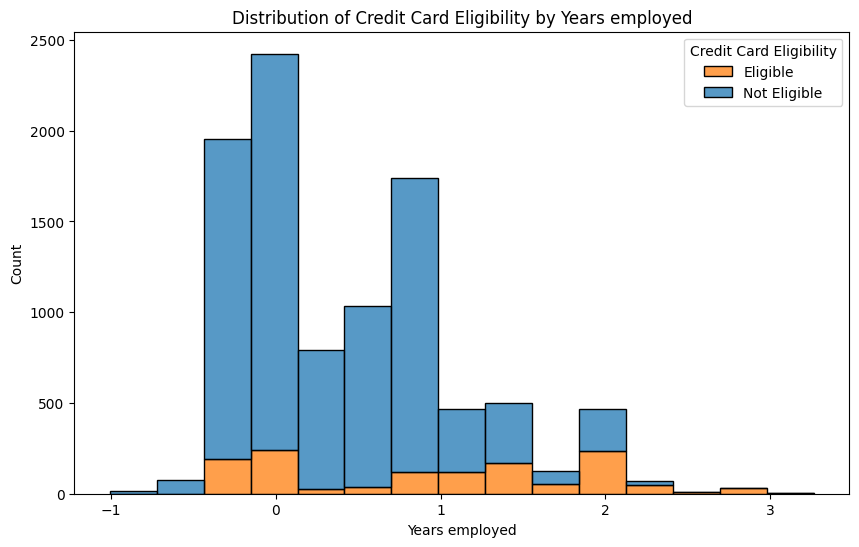

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Years_employed', hue='Target', multiple='stack', bins=15)
plt.title('Distribution of Credit Card Eligibility by Years employed')
plt.xlabel('Years employed')
plt.ylabel('Count')
plt.legend(title='Credit Card Eligibility', labels=['Eligible', 'Not Eligible'])
plt.show()

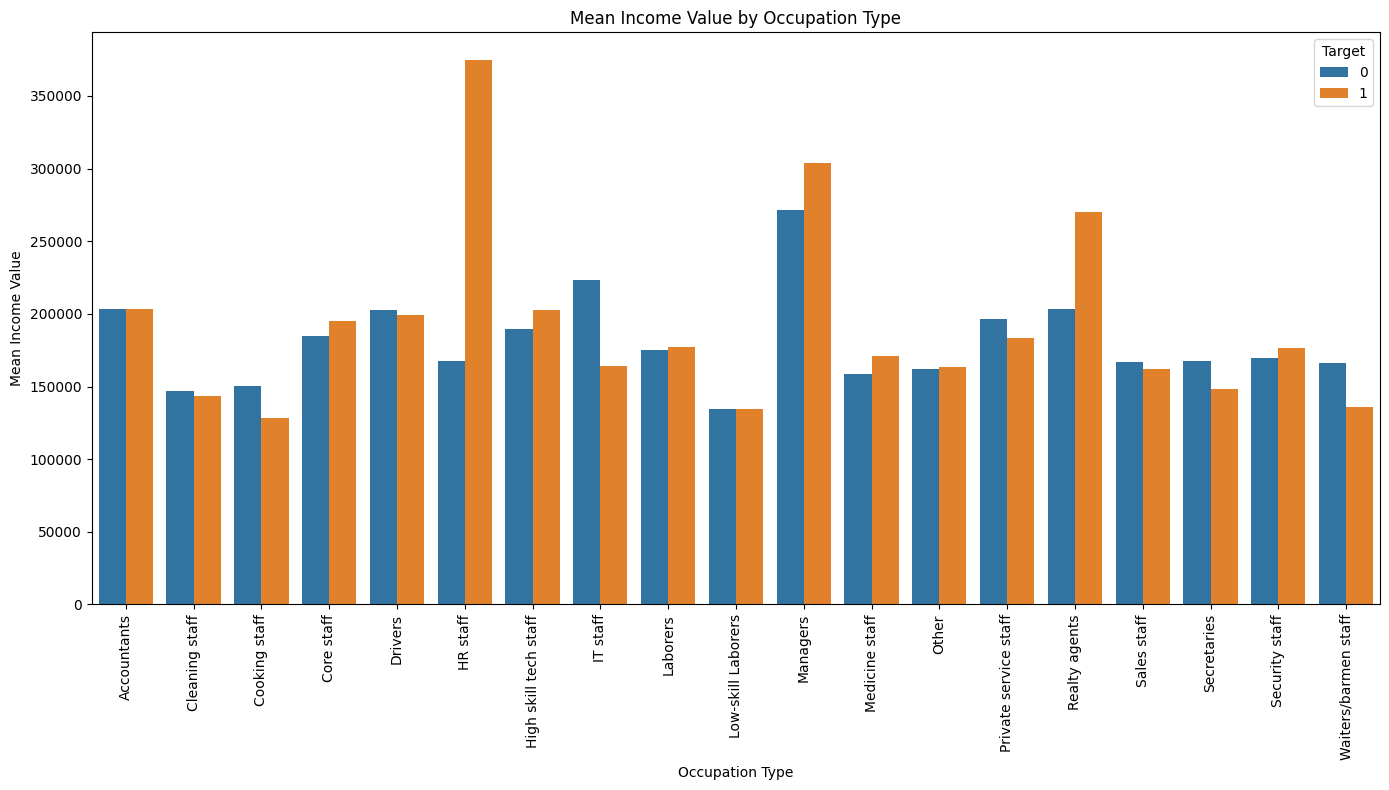

In [78]:
mean_income = data.groupby(['Occupation_type','Target'])['Total_income'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_income, x='Occupation_type', y='Total_income',hue='Target')
plt.xlabel('Occupation Type')
plt.ylabel('Mean Income Value')
plt.title('Mean Income Value by Occupation Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Bank accounts for unborn child
https://edufund.in/blog/investment-schemes-for-unborn-child#:~:text=Bank%20accounts%20cannot%20be%20opened,do%20so%20in%20their%20name.

<Axes: xlabel='Age', ylabel='Account_length'>

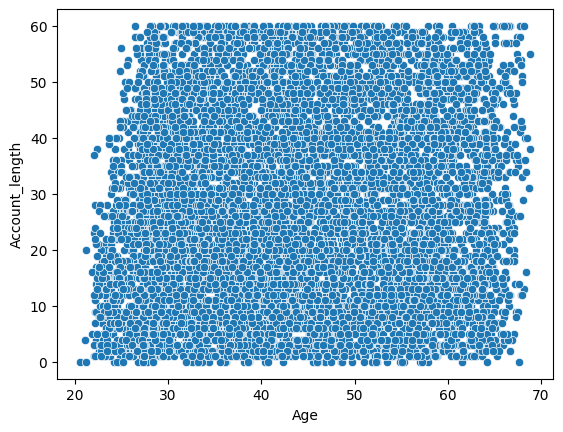

In [18]:
sns.scatterplot(data=data,x='Age',y='Account_length')

In [19]:
#data[data['Account_length'] > data['Age']].shape[0]
data[data['Account_length'] > data['Age']].groupby('Target').size()

Target
0    1747
1     342
dtype: int64

In [20]:
#df['Account_length']=df.apply(lambda x:x['Age'] if x['Account_length']>x['Age'] else x['Account_length'],axis=1)

# Balancing Class

In [21]:
X = df.drop("Target",axis=1)
y = df['Target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [23]:
y_train.value_counts()

Target
0    5898
1     898
Name: count, dtype: int64

In [24]:
adasyn = ADASYN(random_state=42)
X_train, y_train = adasyn.fit_resample(X_train,y_train)

In [25]:
y_train.value_counts()

Target
0    5898
1    5704
Name: count, dtype: int64

# Building Model

### XGBoost Classifier

In [26]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

0.9815549043268402

In [27]:
cm=confusion_matrix(y_test, xgb.predict(X_test))
y_pred=xgb.predict(X_test)

Precision score:  0.625
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2528
           1       0.62      0.51      0.56       385

    accuracy                           0.89      2913
   macro avg       0.78      0.73      0.75      2913
weighted avg       0.89      0.89      0.89      2913



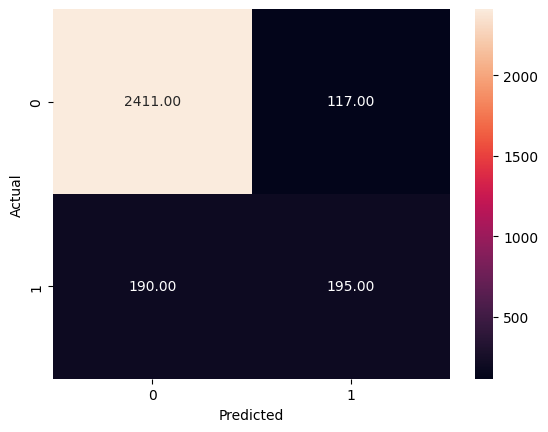

In [28]:
sns.heatmap(cm,annot=True,fmt='.2f')
precision = precision_score(y_test, y_pred)
print('Precision score: ',precision)
plt.xlabel('Predicted')
plt.ylabel('Actual');
print('Classification report:\n',classification_report(y_test, y_pred))

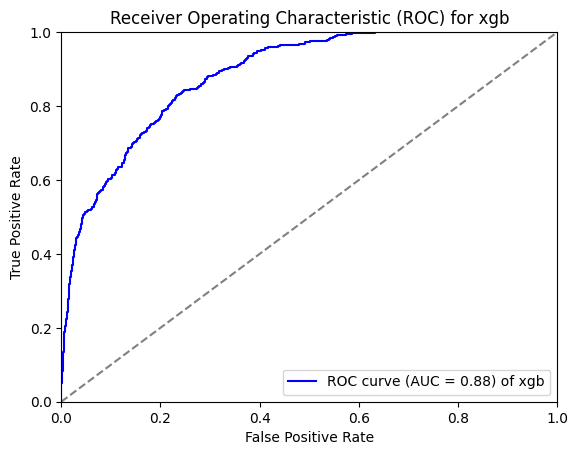

In [29]:
y_prob = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {auc:.2f}) of xgb")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for xgb")
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [30]:
rf = RandomForestClassifier(random_state=43, n_jobs=-1)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9996552318565765

In [31]:
cm=confusion_matrix(y_test, rf.predict(X_test))
y_pred=rf.predict(X_test)

Precision score:  0.5927152317880795
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2528
           1       0.59      0.46      0.52       385

    accuracy                           0.89      2913
   macro avg       0.76      0.71      0.73      2913
weighted avg       0.88      0.89      0.88      2913



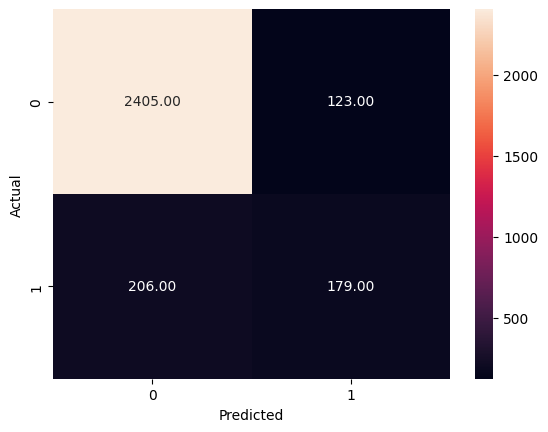

In [32]:
sns.heatmap(cm,annot=True,fmt='.2f')
precision = precision_score(y_test, y_pred)
print('Precision score: ',precision)
plt.xlabel('Predicted')
plt.ylabel('Actual');
print('Classification report:\n',classification_report(y_test, y_pred))

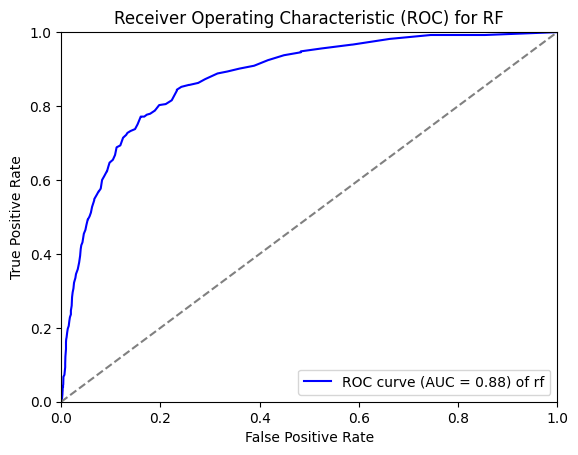

In [33]:
y_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {auc:.2f}) of rf")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for RF")
plt.legend(loc="lower right")
plt.show()

# Hyper parameter tuning

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7]
}

In [35]:
xgb = XGBClassifier(random_state=42)

In [36]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='precision')

In [37]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='precision')

In [38]:
best_xgb = grid_search.best_estimator_

In [39]:
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the best model
xgb_roc_score = roc_auc_score(y_test, y_pred_proba)
print('Best ROC_AUC score: {0:.4f}'.format(xgb_roc_score))
#print('Best parameters:', grid_search.best_params_)

Best ROC_AUC score: 0.8980


In [40]:
cm=confusion_matrix(y_test,grid_search.predict(X_test))

Precision score:  0.6472491909385113
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2528
           1       0.65      0.52      0.58       385

    accuracy                           0.90      2913
   macro avg       0.79      0.74      0.76      2913
weighted avg       0.89      0.90      0.89      2913



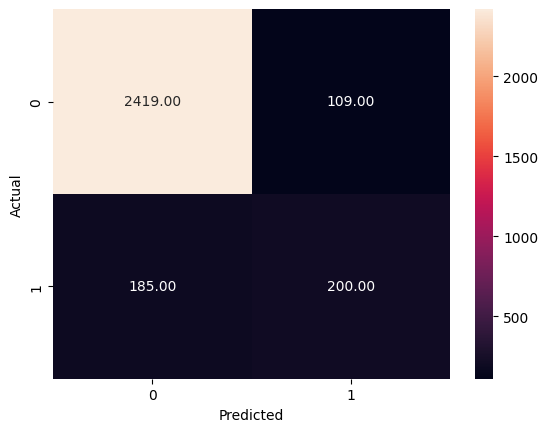

In [41]:
sns.heatmap(cm,annot=True,fmt='.2f')
precision = precision_score(y_test, y_pred)
print('Precision score: ',precision)
plt.xlabel('Predicted')
plt.ylabel('Actual');
print('Classification report:\n',classification_report(y_test, y_pred))

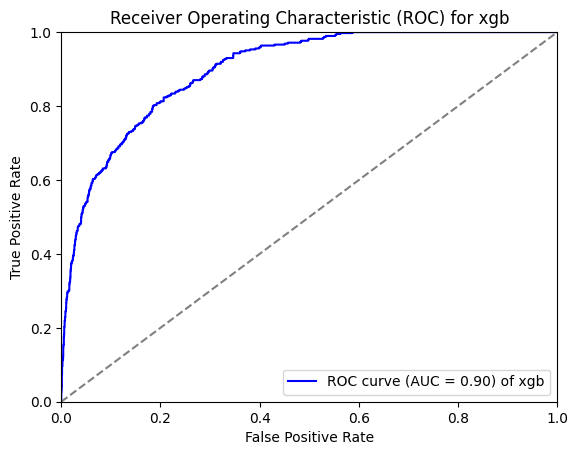

In [42]:
y_prob = best_xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {auc:.2f}) of xgb")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for xgb")
plt.legend(loc="lower right")
plt.show()

# Extra

# ANN

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [44]:
y_train.value_counts()

Target
0    5898
1     898
Name: count, dtype: int64

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
adasyn = ADASYN(random_state=42)
X_train, y_train = adasyn.fit_resample(X_train,y_train)

In [47]:
y_train.value_counts()

Target
0    5898
1    5833
Name: count, dtype: int64

In [48]:
X_train.shape,X_test.shape

((11731, 17), (2913, 17))

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,ReLU
from keras.metrics import Precision, Accuracy,AUC

classifier = Sequential()
classifier.add(Dense(units=17,activation='relu'))
classifier.add(Dense(units=9,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=1,activation='sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
history = classifier.fit(X_train, y_train,validation_split=0.33, epochs=30 , batch_size=32)

Epoch 1/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6161 - loss: 0.6922 - val_accuracy: 0.0000e+00 - val_loss: 1.0656
Epoch 2/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7501 - loss: 0.5766 - val_accuracy: 0.0000e+00 - val_loss: 1.1432
Epoch 3/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7560 - loss: 0.5433 - val_accuracy: 0.0057 - val_loss: 1.1725
Epoch 4/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7708 - loss: 0.5173 - val_accuracy: 0.0434 - val_loss: 1.1253
Epoch 5/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7614 - loss: 0.5226 - val_accuracy: 0.0599 - val_loss: 1.1351
Epoch 6/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7717 - loss: 0.5039 - val_accuracy: 0.1250 - val_loss: 1.1300
Epoch 7/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7816 - loss: 0.4909 - val_accuracy: 0.1668 - val_loss: 1.1295
Epoch 8/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.4762 - val_accu

In [51]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>= 0.5)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [52]:
precision = precision_score(y_test, y_pred)
print('Precision score:', precision)
print('Classification report:\n', classification_report(y_test, y_pred))

Precision score: 0.5965417867435159
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      2528
           1       0.60      0.54      0.57       385

    accuracy                           0.89      2913
   macro avg       0.76      0.74      0.75      2913
weighted avg       0.89      0.89      0.89      2913



In [53]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.7411412954134473


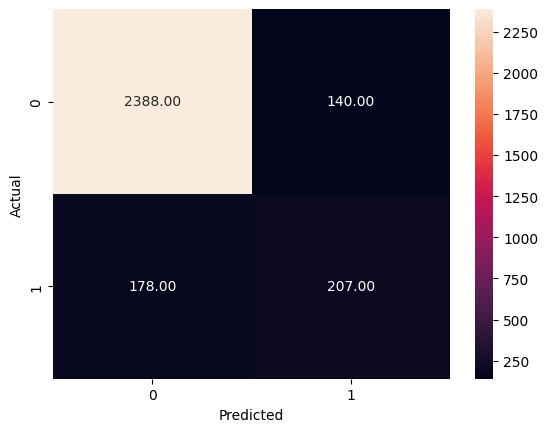

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()